In [124]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else: #linux
    plt.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False


In [167]:
df = pd.read_csv('police_1.csv', encoding='cp949', index_col=["죄종별", "항목"])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4190 entries, ('총계', '발생건수[건]') to ('기타', '법인체[개]')
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2018 년  4102 non-null   object
 1   2019 년  4102 non-null   object
 2   2020 년  4126 non-null   object
 3   2021 년  4137 non-null   object
 4   2022 년  4149 non-null   object
dtypes: object(5)
memory usage: 196.6+ KB


In [169]:
df.head(8)
# 죄종별로 항목이 8개 지정

2018 년   2019 년   2020 년   2021 년   2022 년
죄종별 항목                                                          
총계  발생건수[건]          1580751  1611906  1587866  1429826  1482433
    검거건수[건]          1328609  1342854  1289129  1136665  1133788
    발생건수 대비 검거건수[%]       84     83.3     81.2     79.5     76.5
    검거인원[명]          1728602  1749015  1684367  1360405  1357038
    남자검거인원[명]        1286156  1273899  1212094  1002380  1010855
    여자검거인원[명]         329007   347112   329160   278825   278604
    불상검거인원[명]         113439   128004   143113    79200    67579
    법인체[개]             12302    12620    11983    10317    11610

In [170]:
df

2018 년   2019 년   2020 년   2021 년   2022 년
죄종별 항목                                                          
총계  발생건수[건]          1580751  1611906  1587866  1429826  1482433
    검거건수[건]          1328609  1342854  1289129  1136665  1133788
    발생건수 대비 검거건수[%]       84     83.3     81.2     79.5     76.5
    검거인원[명]          1728602  1749015  1684367  1360405  1357038
    남자검거인원[명]        1286156  1273899  1212094  1002380  1010855
...                      ...      ...      ...      ...      ...
기타  검거인원[명]            25825    28669    25475    19370    19418
    남자검거인원[명]          17593    20382    18191    13949    14100
    여자검거인원[명]           6195     6704     6122     4880     4526
    불상검거인원[명]           2037     1583     1162      541      792
    법인체[개]              1546     2081     2054     1539     1792

[4190 rows x 5 columns]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4190 entries, ('총계', '발생건수[건]') to ('기타', '법인체[개]')
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2018 년  4102 non-null   object
 1   2019 년  4102 non-null   object
 2   2020 년  4126 non-null   object
 3   2021 년  4137 non-null   object
 4   2022 년  4149 non-null   object
dtypes: object(5)
memory usage: 196.6+ KB


In [172]:
len(df)

4190

In [173]:
df.isnull().sum()

2018 년    88
2019 년    88
2020 년    64
2021 년    53
2022 년    41
dtype: int64

In [174]:
print(df.columns)

Index(['2018 년', '2019 년', '2020 년', '2021 년', '2022 년'], dtype='object')


In [175]:
# 죄종별 중 '사기', '전자금융거래법위반', '횡령', '도박범죄' 4개 사용

df.loc['총계']

,2018 년,2019 년,2020 년,2021 년,2022 년
항목,,,,,
발생건수[건],1580751,1611906,1587866,1429826,1482433
검거건수[건],1328609,1342854,1289129,1136665,1133788
발생건수 대비 검거건수[%],84,83.3,81.2,79.5,76.5
검거인원[명],1728602,1749015,1684367,1360405,1357038
남자검거인원[명],1286156,1273899,1212094,1002380,1010855
여자검거인원[명],329007,347112,329160,278825,278604
불상검거인원[명],113439,128004,143113,79200,67579
법인체[개],12302,12620,11983,10317,11610


In [176]:
df.loc['사기']

,2018 년,2019 년,2020 년,2021 년,2022 년
항목,,,,,
발생건수[건],270029,304472,347675,294075,325848
검거건수[건],202300,225121,237407,180418,191900
발생건수 대비 검거건수[%],74.9,73.9,68.3,61.4,58.9
검거인원[명],315627,349329,369317,231204,224977
남자검거인원[명],189100,201152,209019,140397,147301
여자검거인원[명],56091,61483,60870,40778,42925
불상검거인원[명],70436,86694,99428,50029,34751
법인체[개],660,708,678,325,330
검거건수[건],194686,216737,227379,170980,181577


In [177]:
df.loc['전자금융거래법위반']

,2018 년,2019 년,2020 년,2021 년,2022 년
항목,,,,,
발생건수[건],7877,8132,6402,7024,9731
검거건수[건],7720,8151,6301,6637,9245
발생건수 대비 검거건수[%],98,100.2,98.4,94.5,95
검거인원[명],24462,25272,15860,9113,10277
남자검거인원[명],15943,16226,10288,6461,7518
여자검거인원[명],7891,8588,5252,2586,2668
불상검거인원[명],628,458,320,66,91
법인체[개],6,2,13,12,14


In [178]:
df.loc['횡령']

,2018 년,2019 년,2020 년,2021 년,2022 년
항목,,,,,
발생건수[건],55113,58508,58889,50421,60220
검거건수[건],27107,27091,27883,23124,25548
발생건수 대비 검거건수[%],49.2,46.3,47.3,45.9,42.4
검거인원[명],37875,38010,39182,29808,32198
남자검거인원[명],28054,27905,28762,21670,23474
여자검거인원[명],8463,8612,9132,7681,8207
불상검거인원[명],1358,1493,1288,457,517
법인체[개],74,86,100,44,44
검거건수[건],9236,8907,9027,6410,6550


In [179]:
df.loc['도박범죄']

,2018 년,2019 년,2020 년,2021 년,2022 년
항목,,,,,
발생건수[건],6004,8008,8135,6391,4463
검거건수[건],5885,7827,7889,6151,4257
발생건수 대비 검거건수[%],98,97.7,97,96.2,95.4
검거인원[명],20210,22111,21910,15006,12151
남자검거인원[명],16438,18226,18530,12831,10142
여자검거인원[명],3488,3476,3049,2013,1824
불상검거인원[명],284,409,331,162,185
법인체[개],-,4,2,1,2


In [180]:
# 두 행을 선택하기 위해 행 레이블을 리스트로 제공
# 총계는 미지수

df_rows = df.loc[['사기','전자금융거래법위반', '횡령', '도박범죄']]

df_rows

2018 년   2019 년   2020 년   2021 년   2022 년
죄종별       항목                                                          
총계        발생건수[건]          1580751  1611906  1587866  1429826  1482433
          검거건수[건]          1328609  1342854  1289129  1136665  1133788
          발생건수 대비 검거건수[%]       84     83.3     81.2     79.5     76.5
          검거인원[명]          1728602  1749015  1684367  1360405  1357038
          남자검거인원[명]        1286156  1273899  1212094  1002380  1010855
          여자검거인원[명]         329007   347112   329160   278825   278604
          불상검거인원[명]         113439   128004   143113    79200    67579
          법인체[개]             12302    12620    11983    10317    11610
사기        발생건수[건]           270029   304472   347675   294075   325848
          검거건수[건]           202300   225121   237407   180418   191900
          발생건수 대비 검거건수[%]     74.9     73.9     68.3     61.4     58.9
          검거인원[명]           315627   349329   369317   231204   224977
          남자검거인원[명]         189100   201152   209019   140397   147301
          여자검거인원[명]          56091    61483    60870    40778    42925
          불상검거인원[명]          70436    86694    99428    50029    34751
          법인체[개]               660      708      678      325      330
          검거건수[건]           194686   216737   227379   170980   181577
          발생건수 대비 검거건수[%]     74.7     73.7     68.7     63.4     61.3
          검거인원[명]           298243   328026   338902   203661   198402
          남자검거인원[명]         177274   186547   190237   125221   132019
          여자검거인원[명]          51621    56430    54920    35358    38003
          불상검거인원[명]          69348    85049    93745    43082    28380
          법인체[개]               598      606      599      277      282
전자금융거래법위반 발생건수[건]             7877     8132     6402     7024     9731
          검거건수[건]             7720     8151     6301     6637     9245
          발생건수 대비 검거건수[%]       98    100.2     98.4     94.5       95
          검거인원[명]            24462    25272    15860     9113    10277
          남자검거인원[명]          15943    16226    10288     6461     7518
          여자검거인원[명]           7891     8588     5252     2586     2668
          불상검거인원[명]            628      458      320       66       91
          법인체[개]                 6        2       13       12       14
횡령        발생건수[건]            55113    58508    58889    50421    60220
          검거건수[건]            27107    27091    27883    23124    25548
          발생건수 대비 검거건수[%]     49.2     46.3     47.3     45.9     42.4
          검거인원[명]            37875    38010    39182    29808    32198
          남자검거인원[명]          28054    27905    28762    21670    23474
          여자검거인원[명]           8463     8612     9132     7681     8207
          불상검거인원[명]           1358     1493     1288      457      517
          법인체[개]                74       86      100       44       44
          검거건수[건]             9236     8907     9027     6410     6550
          발생건수 대비 검거건수[%]     84.5     83.6     79.8     73.6     67.7
          검거인원[명]            14432    13767    13839     9606     9757
          남자검거인원[명]          11136    10531    10622     7174     7420
          여자검거인원[명]           2937     2954     3023     2311     2223
          불상검거인원[명]            359      282      194      121      114
          법인체[개]                33       32       26       14       15
도박범죄      발생건수[건]             6004     8008     8135     6391     4463
          검거건수[건]             5885     7827     7889     6151     4257
          발생건수 대비 검거건수[%]       98     97.7       97     96.2     95.4
          검거인원[명]            20210    22111    21910    15006    12151
          남자검거인원[명]          16438    18226    18530    12831    10142
          여자검거인원[명]           3488     3476     3049     2013     1824
          불상검거인원[명]            284      409      331      162      185
          법인체[개]                 -        4        2        1        2

In [199]:
# 항목 중 "발생건수[건]만 사용
# 2018 ~ 2022

df_rows_type = ['사기', '전자금융거래법위반', '횡령', '도박범죄']

df_columns = ['발생건수[건]']  

df_data = df.loc[(df_rows_type, '발생건수[건]'), :]

df_data

,,2018 년,2019 년,2020 년,2021 년,2022 년
죄종별,항목,,,,,
사기,발생건수[건],270029,304472,347675,294075,325848
전자금융거래법위반,발생건수[건],7877,8132,6402,7024,9731
횡령,발생건수[건],55113,58508,58889,50421,60220
도박범죄,발생건수[건],6004,8008,8135,6391,4463


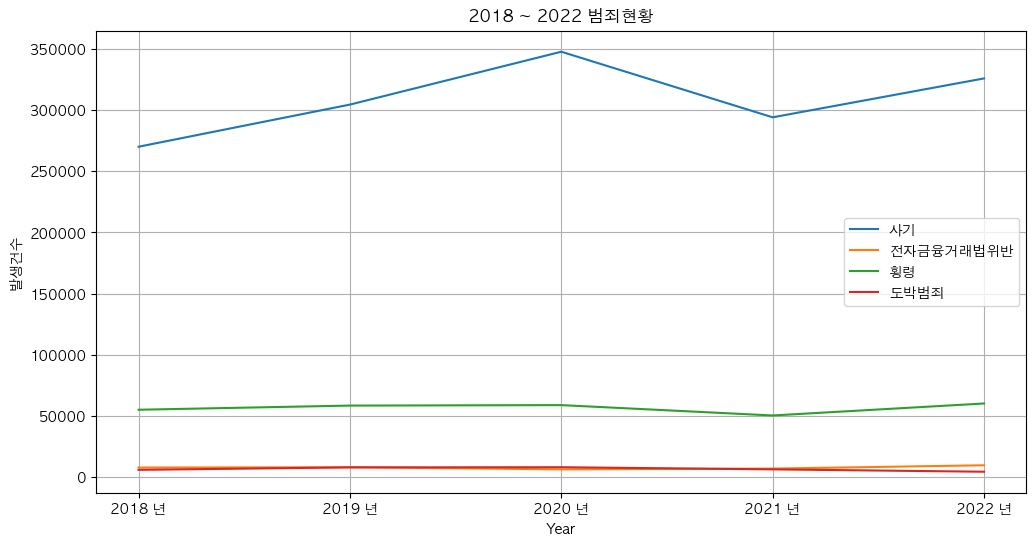

In [213]:
# 데이터 필터링
# X축 = 연도별 / Y축 = 발생건수
df_data = df.loc[(df_rows_type, df_columns), :]

df_data = filtered_data.T

# 연도 별 데이터를 정수로 변환
for year in df_data.columns:
    df_data[year] = pd.to_numeric(df_data[year], errors='coerce')

plt.figure(figsize=(12, 6))
for crime_type in df_rows_type:
    plt.plot(df_data.index, df_data[crime_type], label=crime_type)

plt.title('2018 ~ 2022 범죄현황')
plt.xlabel('Year')
plt.ylabel('발생건수')
plt.legend()
plt.grid(True)
plt.show()

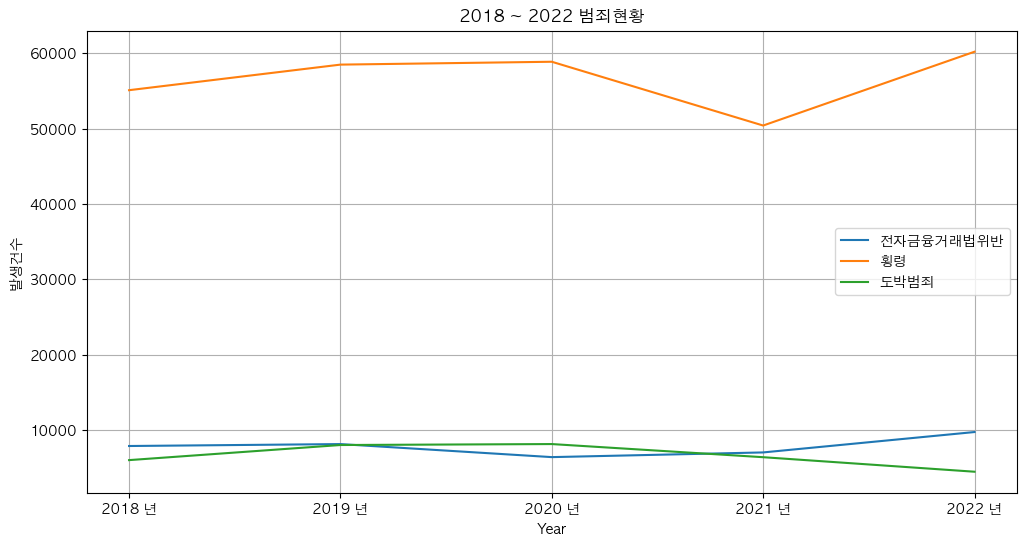

In [229]:
# 사기 항목의 발생건수가 다른 3개의 항목에 비해 많이 높아 사기를 제외한 3개의 항목만 비교하기 위해 df_rows_type에서 사기를 삭제한 후 재그래프화
df_rows_type = ['전자금융거래법위반', '횡령', '도박범죄']

df_data = df.loc[(df_rows_type, df_columns), :]

df_data = filtered_data.T

# 연도 별 데이터를 정수로 변환
for year in df_data.columns:
    df_data[year] = pd.to_numeric(df_data[year], errors='coerce')

plt.figure(figsize=(12, 6))
for crime_type in df_rows_type:
    plt.plot(df_data.index, df_data[crime_type], label=crime_type)

plt.title('2018 ~ 2022 범죄현황')
plt.xlabel('Year')
plt.ylabel('발생건수')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, '2018 ~ 2022 사기')

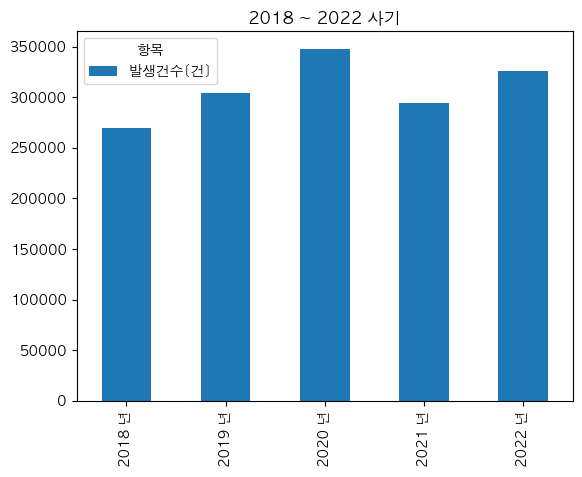

In [230]:
df_data['사기'].plot(kind = 'bar')
plt.title('2018 ~ 2022 사기')

Text(0.5, 1.0, '2018 ~ 2022 전자금융거래법위반')

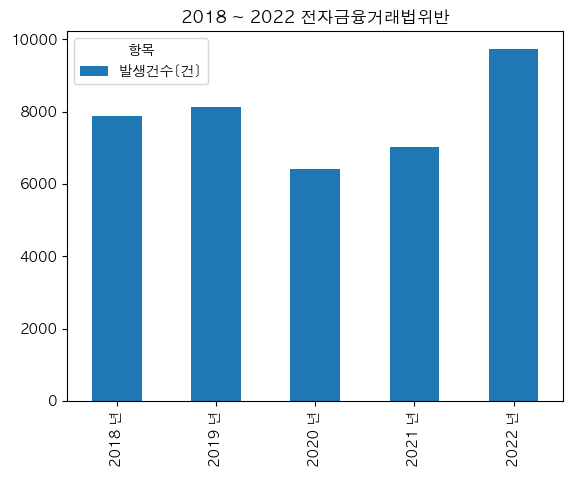

In [231]:
df_data['전자금융거래법위반'].plot(kind = 'bar')
plt.title('2018 ~ 2022 전자금융거래법위반')

Text(0.5, 1.0, '2018 ~ 2022 횡령')

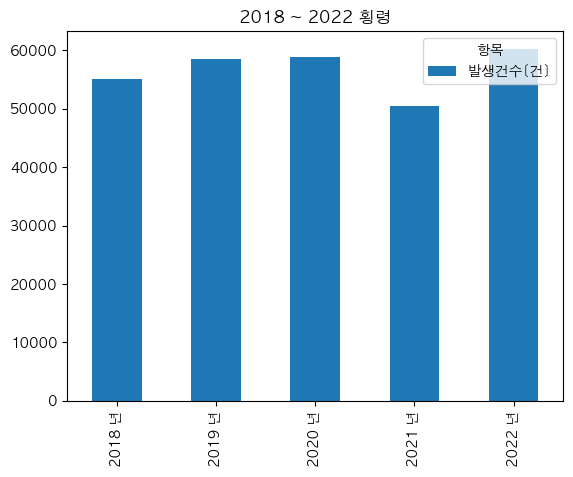

In [232]:
df_data['횡령'].plot(kind = 'bar')
plt.title('2018 ~ 2022 횡령')

Text(0.5, 1.0, '2018 ~ 2022 도박범죄')

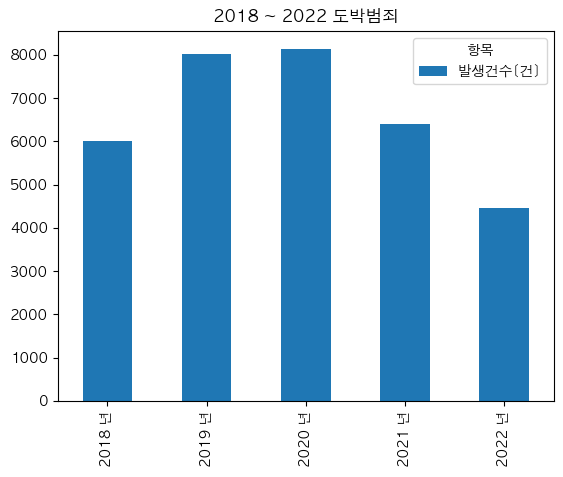

In [233]:
df_data['도박범죄'].plot(kind = 'bar')
plt.title('2018 ~ 2022 도박범죄')